<a href="https://colab.research.google.com/github/aditya301cs/ZOMATO-INSIGHTS-USING-PYTHON/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT : ZOMATO DATA ANALYSIS USING PYTHON

Mounting Google Drive for loading Data Set

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Creating the Data Frame

In [8]:
dataframe = pd.read_csv('/content/drive/MyDrive/Project Data/Zomato data .csv')

In [9]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


Convert the dataType of Coloumn "rate"

In [15]:
def handleRate(value):
  value =str(value).split('/')
  value =value[0];
  return float(value)

In [16]:
dataframe['rate'] =dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Last step for Checking No Null Value in Data

In [18]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [19]:
# Oh yaah! There is no null value in the data

# Analysis.1 What type of restaurant do the majority of customers order from?

In [20]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurent')

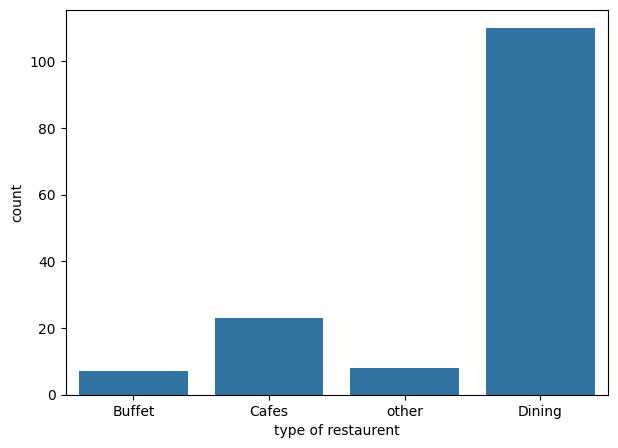

In [21]:

plt.figure(figsize = (7,5))
sns.countplot(x =dataframe['listed_in(type)'])
plt.xlabel("type of restaurent")

Conclusion- Majority of Restaurents falls in dining Category

# Analysis 2. How many votes has each type of restaurant received from customers?

In [22]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'votes')

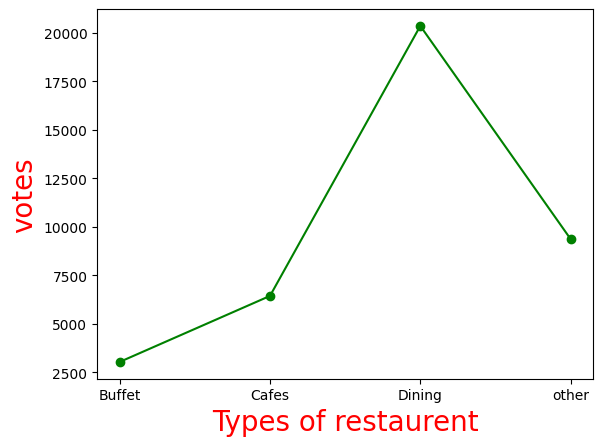

In [23]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c = "green", marker = "o")
plt.xlabel("Types of restaurent", c="red", size = 20)
plt.ylabel("votes", c ="red", size =20)

Conclusion-

1. Dining Restaurents has recieved maximum votes by coustomers.
2. On Buffet and Cafe's restaurents we have work on Marketting for coustomers choice.



# Analysis 3. What are the ratings that the majority of restaurants have received?

In [24]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


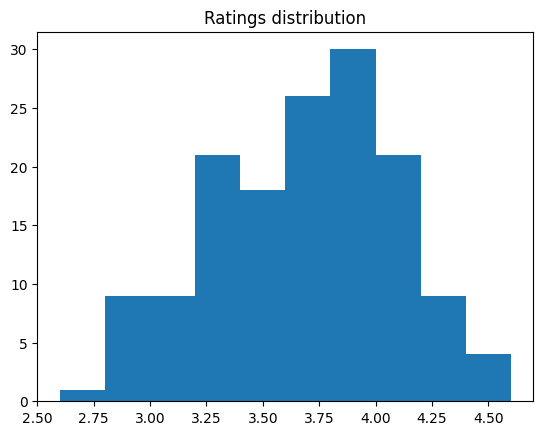

In [25]:
plt.hist(dataframe['rate'], bins =10)
plt.title("Ratings distribution")
plt.show()

Conclusion - The majority of restaurant’s recieved ratings from 3.5 to 4.

# Analysis 4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?

In [26]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

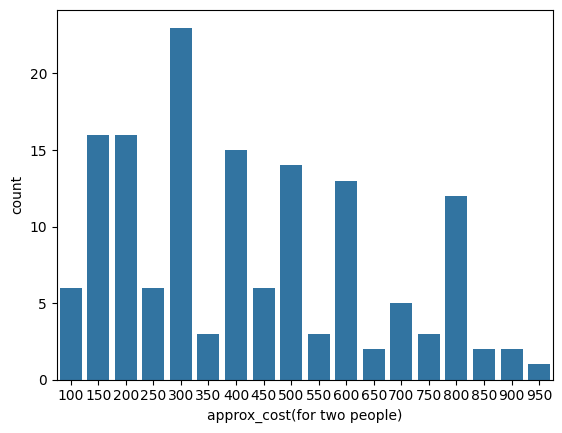

In [27]:
couple_data =dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

Conclusion-

1. average spending on each order is of Rupees 250-350.
2. Majority order is of Rupees 300.
3. Least order is of Rupees 950.





# Analysis 5. Which mode (online or offline) has received the maximum rating?

In [28]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

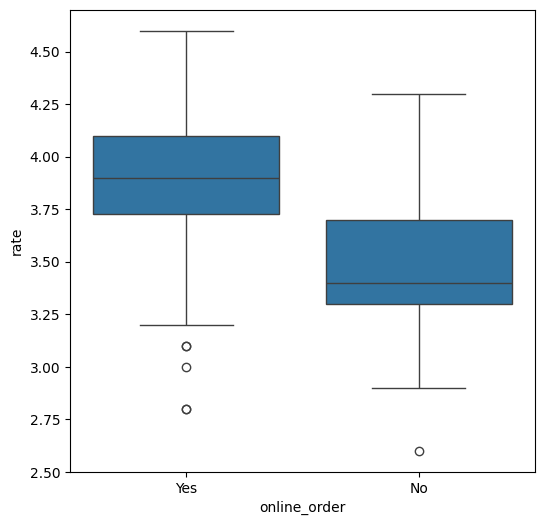

In [29]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y='rate', data = dataframe)

Conclusion-

1. Offline order receive lower rating than online orders
2. Online median rating is 3.90.
3. Offline median rating is 3.40.

# Analysis 6. Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

Creating the pivot table and Heatmap

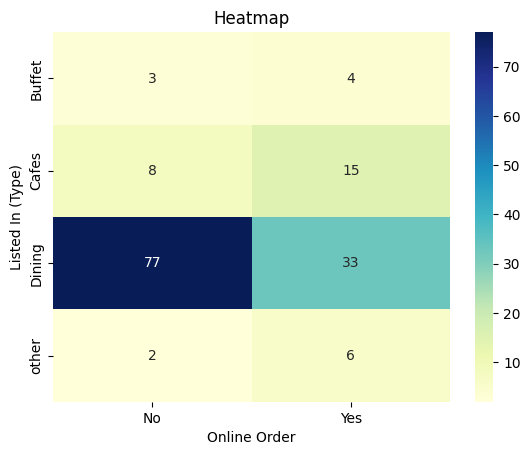

In [34]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

Conclusion:

1. Dining restaurants primarily accept offline orders, whereas Cafe's primarily recieve online orders.
2. This Suggest that clients prefer orders in person at restaurants but prefer online ordering at cafe's.